# 오토인코더 분석

*Note: 최신 버전의 라이브러리를 사용하기 때문에 책의 내용과 결과가 다를 수 있습니다*

## 라이브러리 임포트

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

from models.AE import Autoencoder
from utils.loaders import load_mnist, load_model

In [8]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

## 데이터 적재

In [9]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [23]:
range(len(x_test))

range(0, 10000)

In [33]:
np.random.choice(range(0, 30), 10)

array([29, 18, 11, 22, 19, 24,  2,  4, 18,  6])

In [44]:
example_idx

array([7270,  860, 5390, 5191, 5734, 6265,  466, 4426, 5578, 8322])

In [40]:
x_test.shape

(10000, 28, 28, 1)

## 모델 구조 불러오기

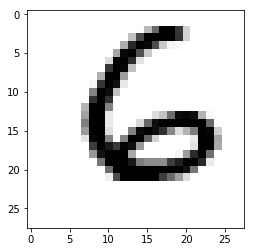

In [55]:
# x_test[860] 무엇인지 확인. 
_fig = plt.figure()
sub = _fig.add_subplot(1,1,1)
sub.imshow(x_test[860].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

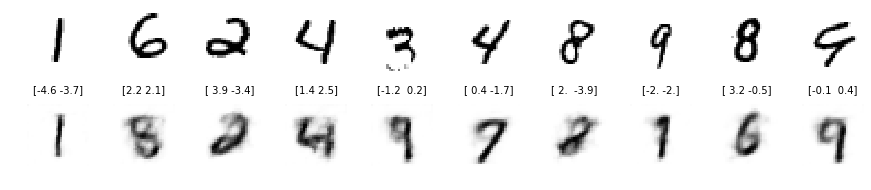

In [12]:
n_to_show = 10 # 보여질 이미지 수. 
np.random.seed(42) # 난수 발생. 
example_idx = np.random.choice(range(len(x_test)), n_to_show) 
# idx = index. 
# len(x_test)=10000. 10000 범위(range(0, 10000)내에서 n_to_show의 갯수만큼 array를 형성한다. 
# for example, np.random.choice(10, 5) = array([4, 1, 7, 5, 1])
# array([7270,  860, 5390, 5191, 5734, 6265,  466, 4426, 5578, 8322]), shape = (10, )
example_images = x_test[example_idx] 
# x_test.shape = (10000, 28, 28, 1)
# example_images = (10, 28, 28, 1)

z_points = AE.encoder.predict(example_images)
reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze() 
    #  squeeze는 차원 중 사이즈가 1인 것을 찾아 스칼라값으로 바꿔 해당 차원을 제거한다.
    # for example, [[0], [1], [2]]의 size는 (3, 1)이나, squeeze()할 경우, [0, 1, 2]로 되어 size가 (3, )이 된다. 
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

## 원본 그림 재구성

## 엔 코더 씨의 전시벽

In [61]:
z_points.shape
# 행의 갯수가 n_to_show 값에 의존. 

(5000, 2)

In [62]:
z_points[1, 1]

2.8869226

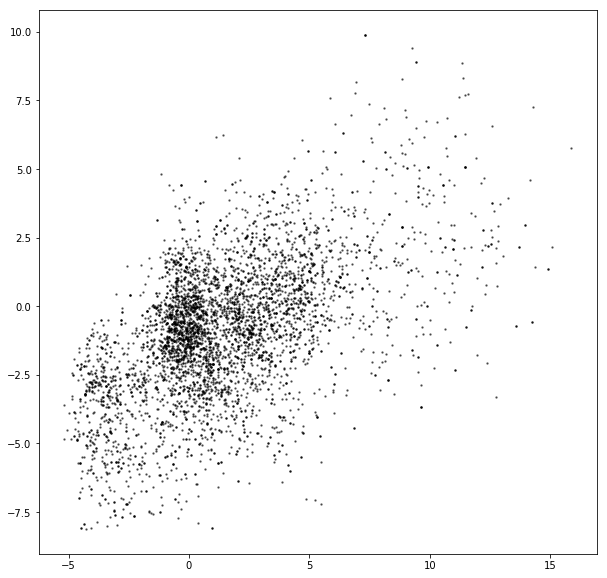

In [56]:
n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()

### 새로 생성한 미술 전시품

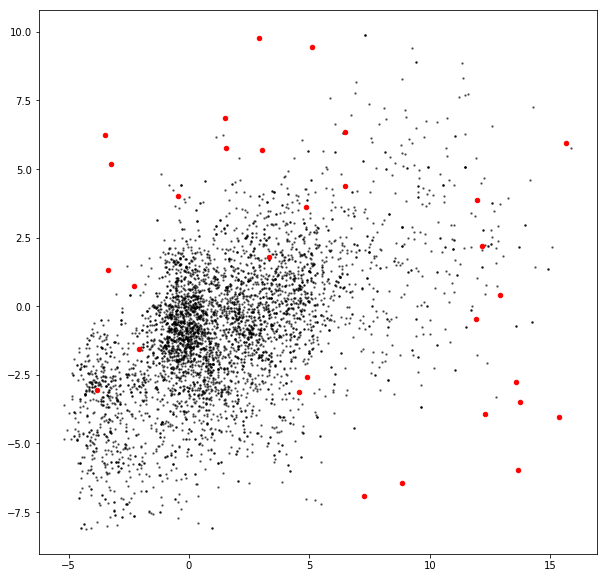

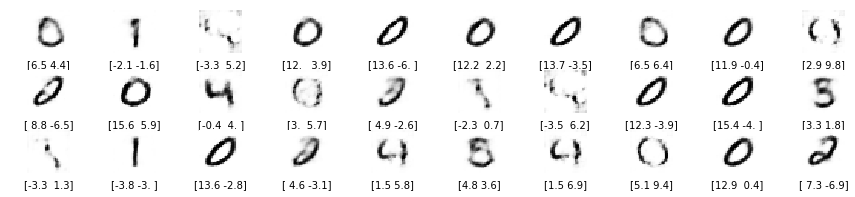

In [57]:
grid_size = 15
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

#################### 여까지 엔 코더 씨의 전시벽 ####################

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

x = np.random.uniform(min_x, max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y, max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)
# 잠재공간에서 (grid_size * grid_depth) 만큼의 랜덤한 포인트 생성.

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c='red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

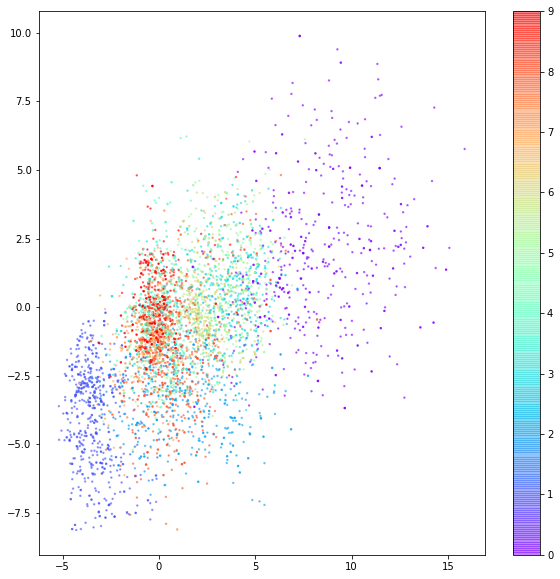

In [58]:
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

plt.show()

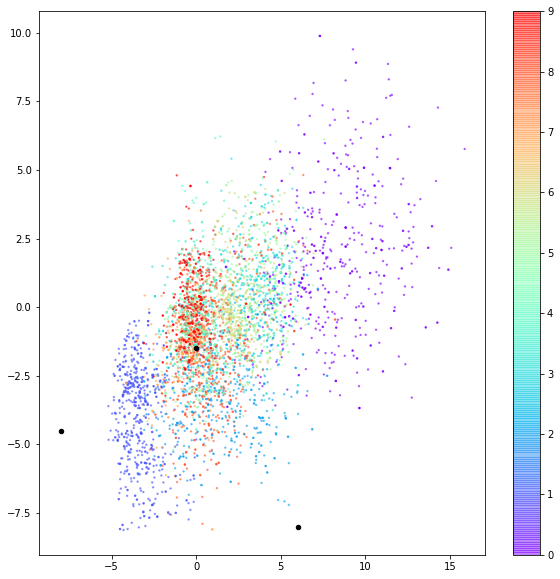

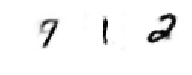

In [59]:
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

bad_examples = np.array([[0, -1.5], [-8, -4.5], [6, -8]]) 
# 나쁜 예시들의 좌표를 임의로 지정. 아마 sample이 아주 많이 겹치거나 sample이 아예 없는 쪽을 고른 듯. 
plt.scatter(bad_examples[:, 0] , bad_examples[:, 1], c='black', alpha=1, s=20)

plt.show()

reconst = AE.decoder.predict(bad_examples)

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

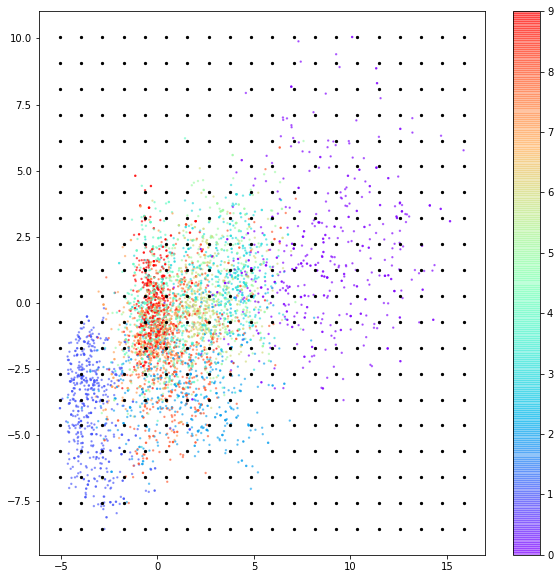

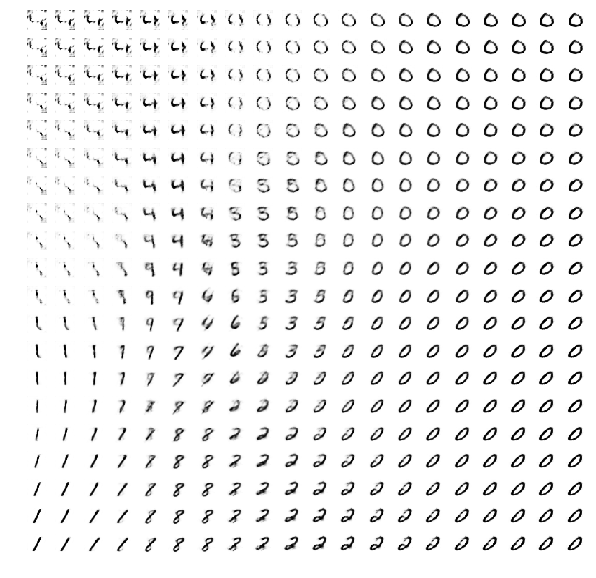

In [60]:
n_to_show = 5000
grid_size = 20

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c=example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')